This notebook is for reducing the entire yelp dataset down to particular cities of interest. It also has some tests of the dataset's size.

In [1]:
import json
from tqdm import tqdm # a nice way to see the progress of long for loops
import pickle
import time
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
biz_data = []
with open('/Users/kevinhale/Desktop/unneeded_yelp_data/yelp_academic_dataset_business.json') as f:
    for line in f:
        biz_data.append(json.loads(line))

In [7]:
rev_data = []
with open('/Users/kevinhale/Desktop/unneeded_yelp_data/yelp_academic_dataset_review.json') as f:
    for line in f:
        rev_data.append(json.loads(line))

In [3]:
pits_zipcodes = [15201, 15202, 15203, 15204, 15205, 15206, 15207, 15208, 15209, 15210, 15211, 15212, 15213, 15214, 15215, 15216, 15217, 15218, 15219, 15220, 15221, 15222, 15223, 15224, 15225, 15226, 15227, 15228, 15229, 15230, 15231, 15232, 15233, 15234, 15235, 15236, 15237, 15238, 15239, 15240, 15241, 15242, 15243, 15244, 15250, 15251, 15252, 15253, 15254, 15255, 15257, 15258, 15259, 15260, 15261, 15262, 15264, 15265, 15267, 15268, 15270, 15272, 15274, 15275, 15276, 15277, 15278, 15279, 15281, 15282, 15283, 15286, 15289, 15290, 15295]
phx_zipcodes = [85001, 85002, 85003, 85004, 85005, 85006, 85007, 85008, 85009, 85010, 85011, 85012, 85013, 85014, 85015, 85016, 85017, 85018, 85019, 85020, 85021, 85022, 85023, 85024, 85025, 85026, 85027, 85028, 85029, 85030, 85031, 85032, 85033, 85034, 85035, 85036, 85037, 85038, 85039, 85040, 85041, 85042, 85043, 85044, 85045, 85046, 85048, 85050, 85051, 85053, 85054, 85055, 85060, 85061, 85062, 85063, 85064, 85065, 85066, 85067, 85068, 85069, 85070, 85071, 85072, 85073, 85074, 85075, 85076, 85078, 85079, 85080, 85082, 85083, 85085, 85086, 85097, 85098, 85099]
char_zipcodes = [28201, 28202, 28203, 28204, 28205, 28206, 28207, 28208, 28209, 28210, 28211, 28212, 28213, 28214, 28215, 28216, 28217, 28218, 28219, 28220, 28221, 28222, 28223, 28224, 28226, 28227, 28228, 28229, 28230, 28231, 28232, 28233, 28234, 28235, 28236, 28237, 28241, 28242, 28243, 28244, 28246, 28247, 28250, 28253, 28254, 28255, 28256, 28258, 28260, 28262, 28263, 28265, 28266, 28269, 28270, 28271, 28272, 28273, 28274, 28275, 28277, 28278, 28280, 28281, 28282, 28284, 28285, 28287, 28288, 28289, 28290, 28296, 28297, 28299]
#Copied from google searches

In [8]:
pits_bizs = []
for biz in biz_data:
    address = biz['full_address']
    zip_code = biz['full_address'][-5:]
    try:
        zip_code = int(zip_code)
    except:
        continue
    if zip_code in char_zipcodes:
        pits_bizs.append(biz)

In [9]:
#Want to make sure all businesses have a reviews element, even if it is empty.
#Also clears out potential duplicates if things have been executed out of order.
for biz in (pits_bizs):
    biz['reviews'] = []

In [10]:
len(rev_data)

2225213

In [11]:
# this takes a long time to run
for i in tqdm(range(len(rev_data))):
    rev = rev_data[i]
    biz_id = rev['business_id'] 
    for biz in pits_bizs:
        if biz_id == biz['business_id']:
            biz['reviews'].append(rev)
            break

In [12]:
pickle.dump(pits_bizs,open("charlotte_bizs.p","wb"))

In [2]:
pits_bizs = pickle.load(open("charlotte_bizs.p","r"))

**Code above this line reduces the data to a city-only dataset**

**Below, we find the date range of our city's data:**

In [3]:
#Get a simple list of all the reviews
pits_revs = []
for biz in pits_bizs:
    pits_revs = pits_revs + biz['reviews']
   

In [4]:
#Check for any duplicate reviews. If true, there are no duplicates.
rev_ids = []
for rev in pits_revs:
    rev_ids.append(rev['review_id'])
len(rev_ids) == len(set(rev_ids))

True

In [5]:
#Convert to python's datetime format
rev_dates = []
for rev in pits_revs:
    rev_date = time.strptime(rev['date'],'%Y-%m-%d')
    rev_dates.append(rev_date)

In [6]:
#Find the earliest review
earliest = rev_dates[0]
earliest_index = 0
for i in range(len(rev_dates)):
    if rev_dates[i] < earliest:
        earliest = rev_dates[i]
        earliest_index = i

In [7]:
print earliest
print earliest_index

time.struct_time(tm_year=2004, tm_mon=10, tm_mday=24, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=298, tm_isdst=-1)
74555


In [8]:
date_years = []
for date in rev_dates:
    date_years.append(date.tm_year)
date_years = Counter(date_years)
years = date_years.keys()
counts = date_years.values()

In [9]:
print counts
print years

[3, 17, 166, 437, 2476, 2604, 7022, 13203, 15073, 19833, 25847, 36027]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


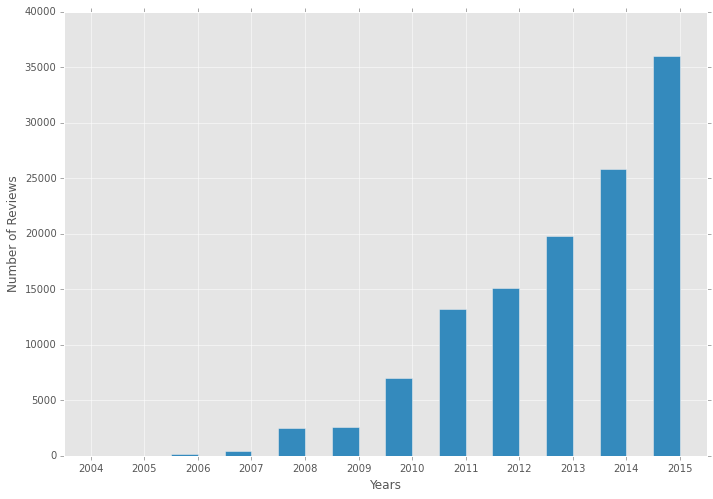

In [12]:
n_groups = len(years)

index = np.arange(n_groups)

fig = plt.figure()
fig.set_size_inches(10,7)
bar_width = 0.5
rects1 = plt.bar(index, counts,bar_width)
plt.xlabel('Years')
plt.ylabel('Number of Reviews')
plt.xticks(index + bar_width, years)


plt.tight_layout()
plt.show()